## **AUTHOR: CHANDOLU SRAVYA**

**GRIP @ THE SPARKS FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

**TASK-2 Prediction using Unsupervised ML**

**Predict the optimum number of clusters from the given ‘Iris’ dataset and represent it visually.**


**K-means: **Here we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.It is a centroid-based algorithm, or a distance-based algorithm.

In [ ]:
#importing important libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns




In [ ]:
#loading iris Dataset-
#df=sns.load_dataset('iris')
#df.head()
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
iris=df.drop('species',axis=1)
display(iris.head())
iris.shape #dataset dimension

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

**DATA TYPES**

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

**SUMMARY OF DATASET**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris.describe()  #summary statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


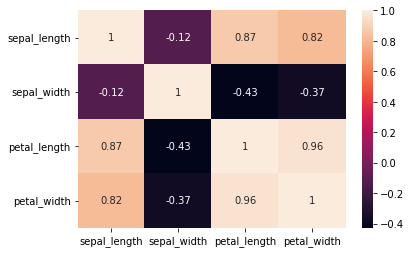

In [ ]:
#Heatmap to check the correlation between the variables

sns.heatmap(iris.corr(),annot=True)
plt.show()


(petal_length is highly correlated with petal_width;
sepal_length is positively correlated with petal_width and petal_length;
sepal_width is negatively correlated with petal_width and petal_length)

###  DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW METHOD

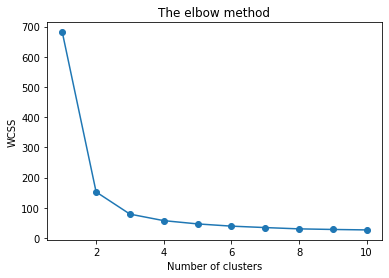

In [ ]:
x = iris.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,marker="o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**From the Elbow plot we can see that at K=3 the inertia stops to drop significantly.**

**CONCLUSION - OPTIMUM NUMBER OF CLUSTERS IS 3 **

**CREATING K-MEANS CLUSTER**
(applying k-means to dataset)

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)


**PLOTTING THE CLUSTERS**

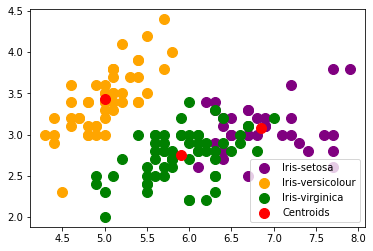

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

**Labelling the predictions**

In [ ]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans=='0', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


**Adding the predictions to the dataset**

In [ ]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)           Cluster
0                5.1               3.5  ...               0.2  Iris-versicolour
1                4.9               3.0  ...               0.2  Iris-versicolour
2                4.7               3.2  ...               0.2  Iris-versicolour
3                4.6               3.1  ...               0.2  Iris-versicolour
4                5.0               3.6  ...               0.2  Iris-versicolour

[5 rows x 5 columns]


**DATA VISUALISATION**


**BARPLOT- CLUSTER DISTRIBUTION**

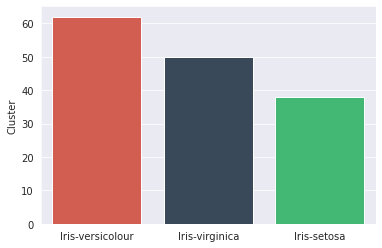

In [ ]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

**Bar Plot Inference -**

There are around 62 iris-versicolour , 50 Iris-virginica and approximately 38 Iris-setosa samples in the dataset as predicted.

**END!**